In [4]:
from molmap import loadmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.random.seed(123)

In [5]:
aspirin = 'CC(=O)OC1=CC=CC=C1C(O)=O' #aspirin
smiles_list = [aspirin]

mp1 = loadmap('../paper/descriptor.mp')
mp2 = loadmap('../paper/fingerprint.mp')

In [6]:
X1 = mp1.batch_transform(smiles_list)
X2 = mp2.batch_transform(smiles_list)

100%|##########| 1/1 [00:00<00:00, 729.57it/s]


In [15]:
x2 = X2[0].sum(axis=-1)

(0.0, 36.0, 37.0, 0.0)

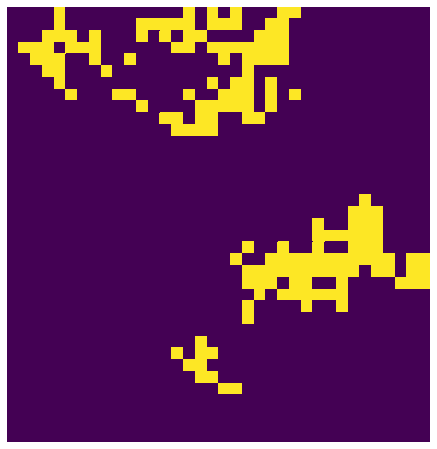

In [48]:
fig, ax = plt.subplots(nrows = 1, ncols=1,  figsize = (8,8))
sns.set(font_scale = 1.1)

sns.heatmap(x2, cmap = 'viridis',
                 square=True, vmin = 0.0, vmax = 1,
                 ax = ax, cbar=False,
                 #annot_kws = {'size': 11},
                 ##cbar_kws = {'fraction':0.046, 'pad': 0.03,  'label': 'Value of Feature Point'}
                )
ax.axis('off')
#plt.savefig('./images/random_and_default_arrangment.png', dpi = 400, bbox_inches ='tight')    

In [13]:
x,y = x2.shape


In [76]:
for i in range(x):
    for j in range(y):
        x_new = x2.copy()
        x_new[i,j] = np.nan
        
        fig, ax = plt.subplots(nrows = 1, ncols=1,  figsize = (4,4))
        sns.set(font_scale = 1.1)

        sns.heatmap(x_new, cmap = 'viridis',
                         square=True, vmin = 0.0, vmax = 1,
                         ax = ax, cbar=False)
        ax.axis('off')
        fig.savefig('./images/%s_%s.jpg' % (str(i).zfill(2), str(j).zfill(2)), dpi = 30, bbox_inches ='tight')    

In [73]:
import glob
from PIL import Image

# filepaths
fp_in = "./images/*.jpg"
fp_out = "perturbation.gif"

files = sorted(glob.glob(fp_in))
np.random.shuffle(files)

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in files]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=0.001, loop=0)

In [74]:
ls -lh

total 3.0M
-rw-rw-r-- 1 shenwanxiang shenwanxiang 448K Apr 22 20:57 01_fmap_plot.ipynb
-rw-rw-r-- 1 shenwanxiang shenwanxiang 8.1K Apr 22 21:54 02_pixel_wise_change.ipynb
-rw-rw-r-- 1 shenwanxiang shenwanxiang  318 Apr 22 19:45 data.txt
drwxrwxr-x 3 shenwanxiang shenwanxiang  36K Apr 22 21:30 images/
-rw-rw-r-- 1 shenwanxiang shenwanxiang 2.5M Apr 22 21:57 perturbation.gif


In [75]:
! rm -r ./images/*.jpg